In [6]:
import pandas as pd
import seaborn as sns
import numpy as np

In [39]:
df = pd.read_csv('train.csv')
df

,ID,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,TRAIN_000,4,103,60,33,192,24.0,0.966,33,0
1,TRAIN_001,10,133,68,0,0,27.0,0.245,36,0
2,TRAIN_002,4,112,78,40,0,39.4,0.236,38,0
3,TRAIN_003,1,119,88,41,170,45.3,0.507,26,0
4,TRAIN_004,1,114,66,36,200,38.1,0.289,21,0
...,...,...,...,...,...,...,...,...,...,...
647,TRAIN_647,1,91,64,24,0,29.2,0.192,21,0
648,TRAIN_648,10,122,68,0,0,31.2,0.258,41,0
649,TRAIN_649,8,84,74,31,0,38.3,0.457,39,0
650,TRAIN_650,2,81,72,15,76,30.1,0.547,25,0


In [63]:
df.groupby('Outcome')[['Glucose', 'BloodPressure', 'SkinThickness', 'Age']].mean()

,Glucose,BloodPressure,SkinThickness,Age
Outcome,,,,
0,110.703065,70.710186,27.390879,31.620283
1,142.114218,74.897810,32.786667,37.026316


In [65]:
df.groupby('AgeBand')[['Glucose', 'BloodPressure', 'SkinThickness']].transform('mean')

/var/folders/6p/kc5wj8m97yv4r_zm5y1n5kk00000gn/T/ipykernel_47397/3319499998.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('AgeBand')[['Glucose', 'BloodPressure', 'SkinThickness']].transform('mean')


,Glucose,BloodPressure,SkinThickness
0,126.911765,73.715385,31.775281
1,126.911765,73.715385,31.775281
2,126.911765,73.715385,31.775281
3,115.049708,68.782209,27.585185
4,115.049708,68.782209,27.585185
...,...,...,...
647,115.049708,68.782209,27.585185
648,126.130000,77.432990,31.096774
649,126.911765,73.715385,31.775281
650,115.049708,68.782209,27.585185


In [26]:
corr = df.select_dtypes(include=[np.number]).corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.103449,0.148058,-0.084128,-0.087169,0.042233,-0.028958,0.511983,0.211340
Glucose,0.103449,1.000000,0.142046,0.071173,0.336526,0.224301,0.125244,0.242086,0.460108
BloodPressure,0.148058,0.142046,1.000000,0.218961,0.091818,0.265858,0.014207,0.225234,0.049459
SkinThickness,-0.084128,0.071173,0.218961,1.000000,0.436097,0.365557,0.170572,-0.108915,0.052094
Insulin,-0.087169,0.336526,0.091818,0.436097,1.000000,0.189895,0.201508,-0.052231,0.123246
BMI,0.042233,0.224301,0.265858,0.365557,0.189895,1.000000,0.095714,0.038796,0.294390
DiabetesPedigreeFunction,-0.028958,0.125244,0.014207,0.170572,0.201508,0.095714,1.000000,0.035520,0.173584
Age,0.511983,0.242086,0.225234,-0.108915,-0.052231,0.038796,0.035520,1.000000,0.218183
Outcome,0.211340,0.460108,0.049459,0.052094,0.123246,0.294390,0.173584,0.218183,1.000000


In [40]:
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
df[cols] = df[cols].replace(0, pd.NA)
df

,ID,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,TRAIN_000,4,103,60,33,192,24.0,0.966,33,0
1,TRAIN_001,10,133,68,<NA>,<NA>,27.0,0.245,36,0
2,TRAIN_002,4,112,78,40,<NA>,39.4,0.236,38,0
3,TRAIN_003,1,119,88,41,170,45.3,0.507,26,0
4,TRAIN_004,1,114,66,36,200,38.1,0.289,21,0
...,...,...,...,...,...,...,...,...,...,...
647,TRAIN_647,1,91,64,24,<NA>,29.2,0.192,21,0
648,TRAIN_648,10,122,68,<NA>,<NA>,31.2,0.258,41,0
649,TRAIN_649,8,84,74,31,<NA>,38.3,0.457,39,0
650,TRAIN_650,2,81,72,15,76,30.1,0.547,25,0


In [41]:
df.isnull().sum()

ID                            0
Pregnancies                   0
Glucose                       4
BloodPressure                30
SkinThickness               195
Insulin                     318
BMI                           7
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

<Axes: xlabel='Age', ylabel='Glucose'>

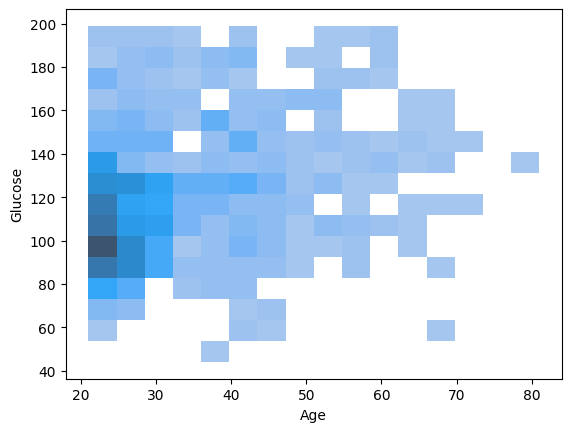

In [72]:
sns.histplot(df, x='Age', y='Glucose')

<Axes: xlabel='Glucose', ylabel='Count'>

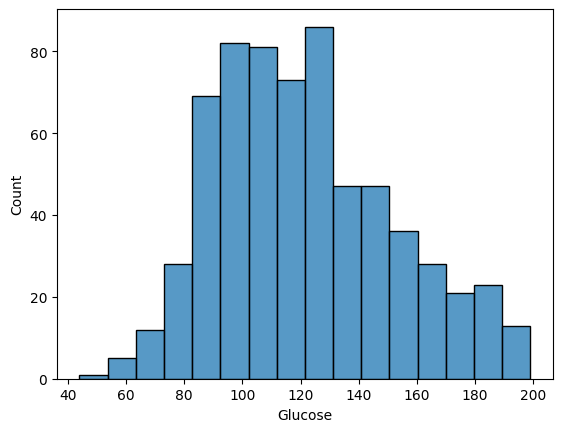

In [75]:
sns.histplot(df['Glucose'])

<Axes: xlabel='Outcome', ylabel='Glucose'>

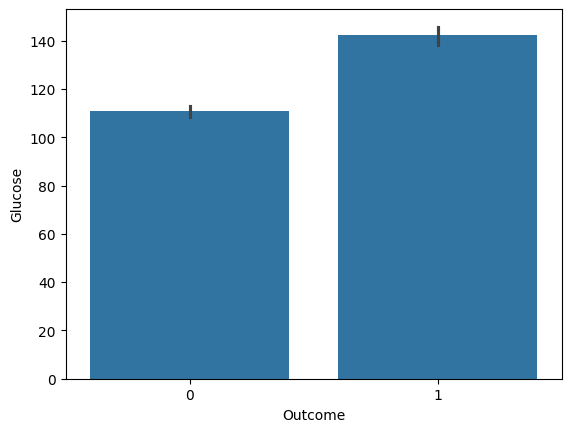

In [81]:
sns.barplot(df, x='Outcome', y='Glucose')

<Axes: xlabel='SkinThickness', ylabel='BMI'>

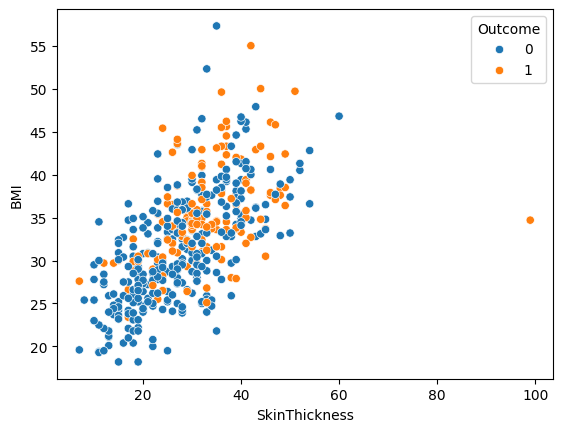

In [83]:
sns.scatterplot(df, x='SkinThickness', y='BMI', hue='Outcome')

In [16]:
df.groupby('Age')[['Pregnancies', 'Glucose', "BloodPressure", 'SkinThickness', 'Insulin', 'BMI']].mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI
Age,,,,,,
21,1.666667,110.12766,65.645833,23.02381,146.103448,28.906383
22,2.0,110.951613,66.666667,25.27451,122.333333,30.542623
23,2.0,113.176471,70.25,26.37931,171.56,31.614706
24,2.535714,116.727273,68.9375,29.965517,114.6,33.015625
25,2.516129,107.8,64.888889,28.677419,142.36,31.674359
26,2.473684,118.851852,67.923077,30.181818,128.05,34.948148
27,3.26087,115.148148,74.230769,28.411765,131.916667,31.559259
28,3.357143,123.0,72.821429,30.347826,171.176471,33.796667
29,3.818182,126.0,73.045455,34.285714,175.5,33.420833


In [42]:
df['AgeBand'] = pd.cut(df['Age'], bins=[20, 30, 40, 50, 60, 70, 100], labels=['20대', '30대', '40대', '50대', '60대', '70대이상'])
df

,ID,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeBand
0,TRAIN_000,4,103,60,33,192,24.0,0.966,33,0,30대
1,TRAIN_001,10,133,68,<NA>,<NA>,27.0,0.245,36,0,30대
2,TRAIN_002,4,112,78,40,<NA>,39.4,0.236,38,0,30대
3,TRAIN_003,1,119,88,41,170,45.3,0.507,26,0,20대
4,TRAIN_004,1,114,66,36,200,38.1,0.289,21,0,20대
...,...,...,...,...,...,...,...,...,...,...,...
647,TRAIN_647,1,91,64,24,<NA>,29.2,0.192,21,0,20대
648,TRAIN_648,10,122,68,<NA>,<NA>,31.2,0.258,41,0,40대
649,TRAIN_649,8,84,74,31,<NA>,38.3,0.457,39,0,30대
650,TRAIN_650,2,81,72,15,76,30.1,0.547,25,0,20대


In [43]:
glucose_mean = df.groupby('AgeBand')['Glucose'].transform('mean')

/var/folders/6p/kc5wj8m97yv4r_zm5y1n5kk00000gn/T/ipykernel_47397/3501649691.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  glucose_mean = df.groupby('AgeBand')['Glucose'].transform('mean')


In [44]:
df['Glucose'] = df['Glucose'].fillna(glucose_mean)
df.isnull().sum()

/var/folders/6p/kc5wj8m97yv4r_zm5y1n5kk00000gn/T/ipykernel_47397/881368231.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Glucose'] = df['Glucose'].fillna(glucose_mean)


ID                            0
Pregnancies                   0
Glucose                       0
BloodPressure                30
SkinThickness               195
Insulin                     318
BMI                           7
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
AgeBand                       0
dtype: int64

In [ ]:
df.groupby('Outcome')['Gl']

In [47]:
bp_mean = df.groupby('AgeBand')['BloodPressure'].transform('mean')
bp_mean

/var/folders/6p/kc5wj8m97yv4r_zm5y1n5kk00000gn/T/ipykernel_47397/689424859.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bp_mean = df.groupby('AgeBand')['BloodPressure'].transform('mean')


0      73.715385
1      73.715385
2      73.715385
3      68.782209
4      68.782209
         ...    
647    68.782209
648     77.43299
649    73.715385
650    68.782209
651    68.782209
Name: BloodPressure, Length: 652, dtype: object

In [48]:
df['BloodPressure'] = df['BloodPressure'].fillna(bp_mean)

/var/folders/6p/kc5wj8m97yv4r_zm5y1n5kk00000gn/T/ipykernel_47397/2595714790.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['BloodPressure'] = df['BloodPressure'].fillna(bp_mean)


In [49]:
df.isnull().sum()

ID                            0
Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness               195
Insulin                     318
BMI                           7
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
AgeBand                       0
dtype: int64

<Axes: xlabel='Glucose', ylabel='Age'>

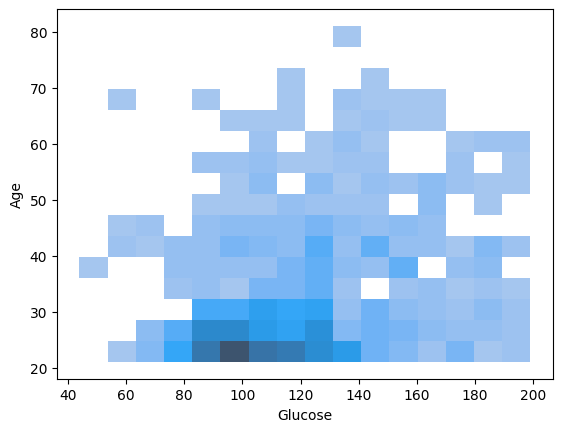

In [54]:
sns.histplot(df, x='Glucose', y='Age')

<Axes: xlabel='Outcome', ylabel='Glucose'>

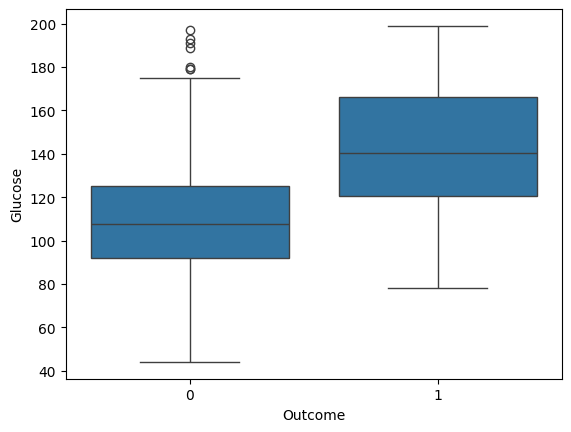

In [57]:
sns.boxplot(df, x='Outcome', y='Glucose')

<Axes: xlabel='Glucose', ylabel='BMI'>

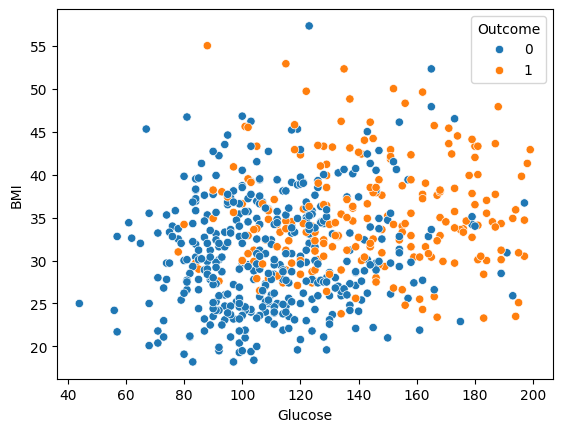

In [58]:
sns.scatterplot(df, x='Glucose', y='BMI', hue='Outcome')

<Axes: >

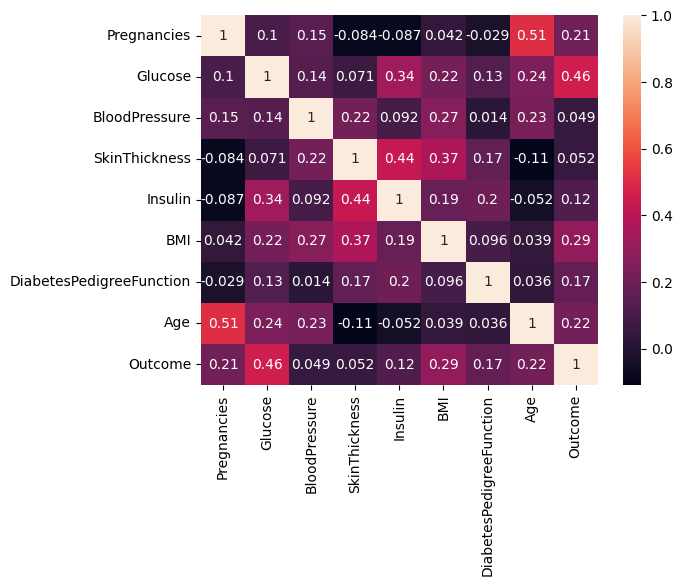

In [59]:
sns.heatmap(corr, annot=True)

In [87]:
df[df['Pregnancies']< 4]

,ID,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeBand
3,TRAIN_003,1,119.0,88.0,41,170,45.3,0.507,26,0,20대
4,TRAIN_004,1,114.0,66.0,36,200,38.1,0.289,21,0,20대
5,TRAIN_005,3,78.0,50.0,32,88,31.0,0.248,26,1,20대
6,TRAIN_006,1,91.0,54.0,25,100,25.2,0.234,23,0,20대
8,TRAIN_008,1,124.0,60.0,32,<NA>,35.8,0.514,21,0,20대
...,...,...,...,...,...,...,...,...,...,...,...
642,TRAIN_642,1,108.0,88.0,19,<NA>,27.1,0.400,24,0,20대
644,TRAIN_644,3,162.0,52.0,38,<NA>,37.2,0.652,24,1,20대
647,TRAIN_647,1,91.0,64.0,24,<NA>,29.2,0.192,21,0,20대
650,TRAIN_650,2,81.0,72.0,15,76,30.1,0.547,25,0,20대


In [91]:

import time

def make_coffee():
    print("커피 주문")
    time.sleep(3)
    print("커피 완료")

def eat_snack():
    print("과자 먹기")

make_coffee()
eat_snack()

커피 주문
커피 완료
과자 먹기


In [92]:
import asyncio

async def make_coffee():
    print("커피 주문")
    await asyncio.sleep(3)
    print("커피 완료")

async def eat_snack():
    print("과자 먹기")

async def main():
    await asyncio.gather(make_coffee(), eat_snack())

await main()

커피 주문
과자 먹기
커피 완료


In [93]:
import csv